In [1]:
#Imports and data reading.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Check columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

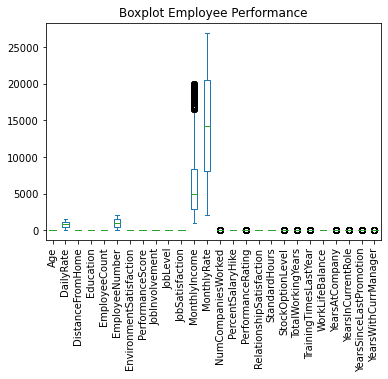

In [3]:
#Plotting outliers in each columns
plt.figure(figsize=(10,10))
df.plot.box(title='Boxplot Employee Performance',rot=90)

plt.show()

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

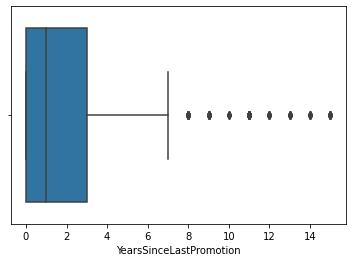

In [4]:
#Box plot of YearsSinceLastPromotion column
sns.boxplot(df['YearsSinceLastPromotion'])

In [5]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsSinceLastPromotion"].quantile(0.25)
Q3 = df["YearsSinceLastPromotion"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#Finding outliers 
#np.where(df['YearsSinceLastPromotion']>Upper_Fence)

#finding upper fence and trimming the dataset
df = df[df['YearsSinceLastPromotion'] < Upper_Fence]
df.shape

(1363, 35)

<AxesSubplot:xlabel='YearsAtCompany'>

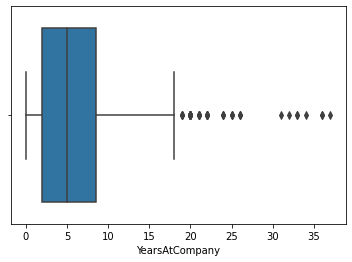

In [6]:
#Box plot of YearsAtCompany column
sns.boxplot(df['YearsAtCompany'])

In [7]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsAtCompany"].quantile(0.25)
Q3 = df["YearsAtCompany"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['YearsAtCompany'] < Upper_Fence]
df.shape

(1313, 35)

<AxesSubplot:xlabel='NumCompaniesWorked'>

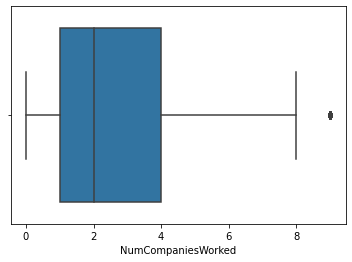

In [8]:
#Box plot of NumCompaniesWorked column
sns.boxplot(df['NumCompaniesWorked'])

In [9]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["NumCompaniesWorked"].quantile(0.25)
Q3 = df["NumCompaniesWorked"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['NumCompaniesWorked'] < Upper_Fence]
df.shape

(1265, 35)

<AxesSubplot:xlabel='MonthlyIncome'>

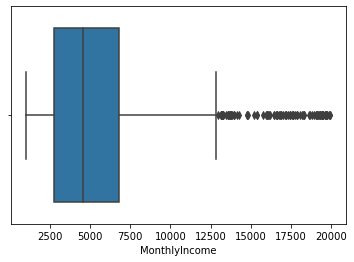

In [10]:
#Box plot of MonthlyIncome column
sns.boxplot(df['MonthlyIncome'])

In [11]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
df.shape

(1167, 35)

<AxesSubplot:xlabel='MonthlyRate'>

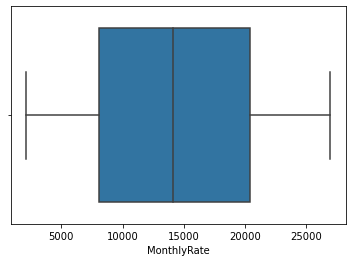

In [12]:
#Box plot of MonthlyRate column. No Outliers available 
sns.boxplot(df['MonthlyRate'])

<AxesSubplot:xlabel='DailyRate'>

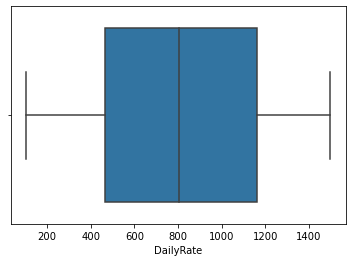

In [13]:
#Box plot of DailyRate column. No Outliers available 
sns.boxplot(df['DailyRate'])

<AxesSubplot:xlabel='TotalWorkingYears'>

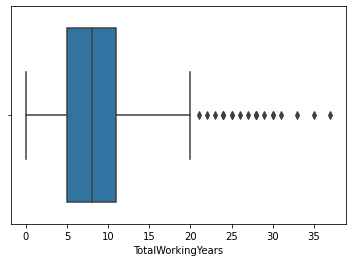

In [14]:
#Box plot of TotalWorkingYears column.
sns.boxplot(df['TotalWorkingYears'])

In [15]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["TotalWorkingYears"].quantile(0.25)
Q3 = df["TotalWorkingYears"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['TotalWorkingYears'] < Upper_Fence]
df.shape

(1130, 35)

<AxesSubplot:xlabel='PercentSalaryHike'>

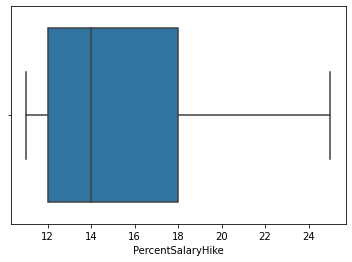

In [16]:
#Box plot of PercentSalaryHike column. No Outliers available
sns.boxplot(df['PercentSalaryHike'])

<AxesSubplot:xlabel='PerformanceScore'>

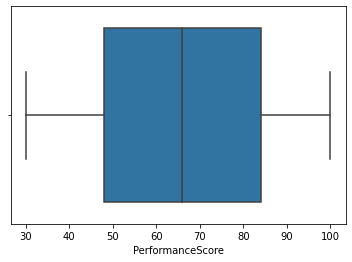

In [17]:
#Box plot of PerformanceScore column. No Outliers available
sns.boxplot(df['PerformanceScore'])

In [18]:
#Checking number of rows and columns respectively 
df.shape

(1130, 35)

<Figure size 720x720 with 0 Axes>

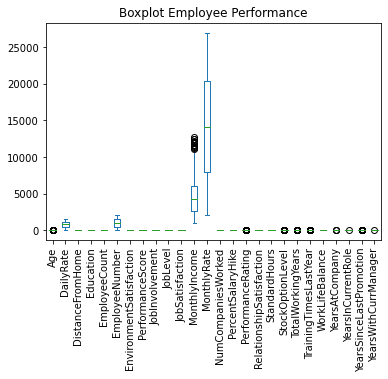

In [19]:
#Plotting outliers to make sure whether there are any more outliers in each columns
# Still there are some more outliers
plt.figure(figsize=(10,10))
df.plot.box(title='Boxplot Employee Performance',rot=90)

plt.show()

#### Removing outliers until each column is left with 0 outliers

##### YearsSinceLastPromotion

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

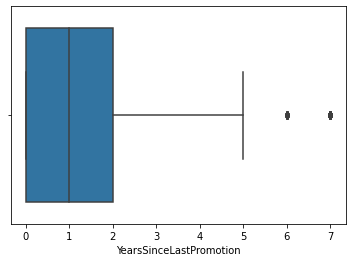

In [20]:
#Box plot of YearsSinceLastPromotion column
sns.boxplot(df['YearsSinceLastPromotion'])

(1009, 35)


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

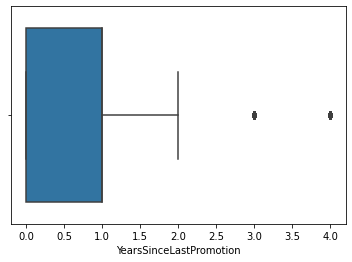

In [21]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsSinceLastPromotion"].quantile(0.25)
Q3 = df["YearsSinceLastPromotion"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#Finding outliers 
#np.where(df['YearsSinceLastPromotion']>Upper_Fence)

#finding upper fence and trimming the dataset
df = df[df['YearsSinceLastPromotion'] < Upper_Fence]
print(df.shape)

#Box plot of YearsSinceLastPromotion column
sns.boxplot(df['YearsSinceLastPromotion'])

(928, 35)


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

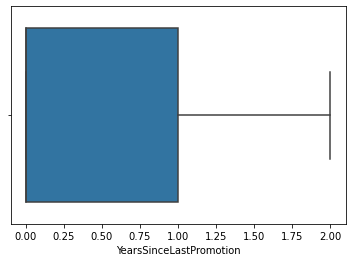

In [22]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsSinceLastPromotion"].quantile(0.25)
Q3 = df["YearsSinceLastPromotion"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#Finding outliers 
#np.where(df['YearsSinceLastPromotion']>Upper_Fence)

#finding upper fence and trimming the dataset
df = df[df['YearsSinceLastPromotion'] < Upper_Fence]
print(df.shape)

#Box plot of YearsSinceLastPromotion column
sns.boxplot(df['YearsSinceLastPromotion'])

##### YearsAtCompany

<AxesSubplot:xlabel='YearsAtCompany'>

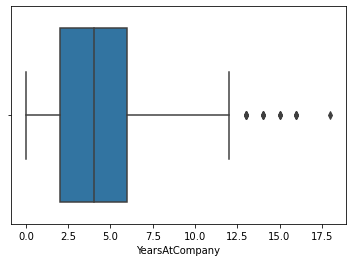

In [23]:
#Box plot of YearsAtCompany column
sns.boxplot(df['YearsAtCompany'])

(907, 35)


<AxesSubplot:xlabel='YearsAtCompany'>

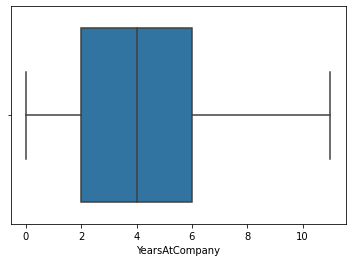

In [24]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsAtCompany"].quantile(0.25)
Q3 = df["YearsAtCompany"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['YearsAtCompany'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['YearsAtCompany'])

##### NumCompaniesWorked

<AxesSubplot:xlabel='NumCompaniesWorked'>

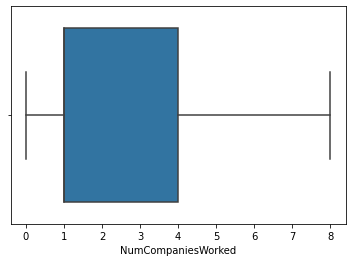

In [25]:
#Box plot of NumCompaniesWorked column
sns.boxplot(df['NumCompaniesWorked'])

##### MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome'>

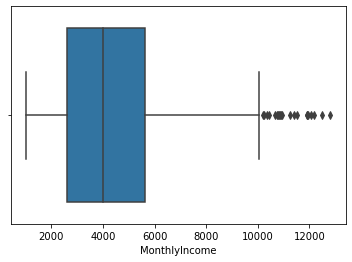

In [26]:
#Box plot of MonthlyIncome column
sns.boxplot(df['MonthlyIncome'])

(886, 35)


<AxesSubplot:xlabel='MonthlyIncome'>

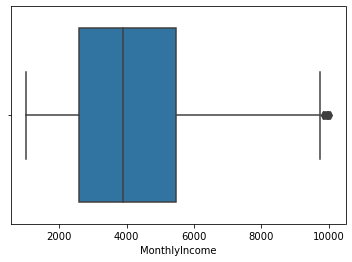

In [27]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['MonthlyIncome'])

(874, 35)


<AxesSubplot:xlabel='MonthlyIncome'>

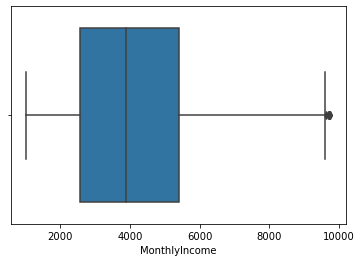

In [28]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['MonthlyIncome'])

(867, 35)


<AxesSubplot:xlabel='MonthlyIncome'>

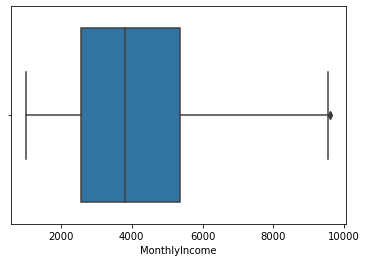

In [29]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['MonthlyIncome'])

(865, 35)


<AxesSubplot:xlabel='MonthlyIncome'>

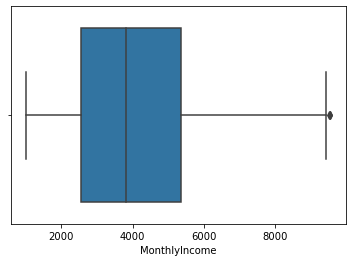

In [30]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['MonthlyIncome'])

(862, 35)


<AxesSubplot:xlabel='MonthlyIncome'>

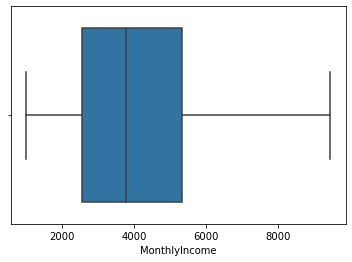

In [31]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["MonthlyIncome"].quantile(0.25)
Q3 = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['MonthlyIncome'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['MonthlyIncome'])

##### TotalWorkingYears

<AxesSubplot:xlabel='TotalWorkingYears'>

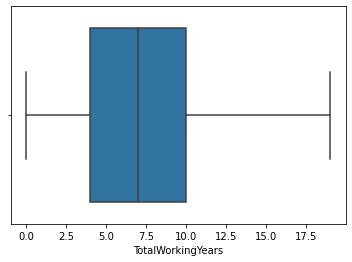

In [32]:
#Box plot of TotalWorkingYears column.
sns.boxplot(df['TotalWorkingYears'])

(850, 35)


<AxesSubplot:xlabel='TotalWorkingYears'>

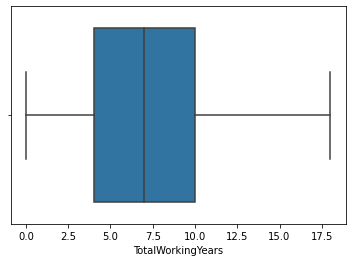

In [33]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["TotalWorkingYears"].quantile(0.25)
Q3 = df["TotalWorkingYears"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

#finding upper fence and trimming the dataset
df = df[df['TotalWorkingYears'] < Upper_Fence]
print(df.shape)

sns.boxplot(df['TotalWorkingYears'])

In [34]:
#Filtering only the currently working employee's data
df = df[df["Attrition"] == "No"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       686 non-null    int64 
 1   Attrition                 686 non-null    object
 2   BusinessTravel            686 non-null    object
 3   DailyRate                 686 non-null    int64 
 4   Department                686 non-null    object
 5   DistanceFromHome          686 non-null    int64 
 6   Education                 686 non-null    int64 
 7   EducationField            686 non-null    object
 8   EmployeeCount             686 non-null    int64 
 9   EmployeeNumber            686 non-null    int64 
 10  EnvironmentSatisfaction   686 non-null    int64 
 11  Gender                    686 non-null    object
 12  PerformanceScore          686 non-null    int64 
 13  JobInvolvement            686 non-null    int64 
 14  JobLevel                 

<Figure size 720x720 with 0 Axes>

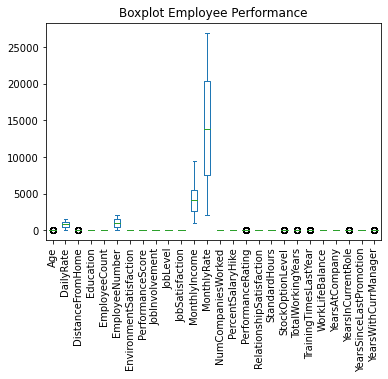

In [35]:
#Plotting outliers in each columns
plt.figure(figsize=(10,10))
df.plot.box(title='Boxplot Employee Performance',rot=90)

plt.show()

In [36]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


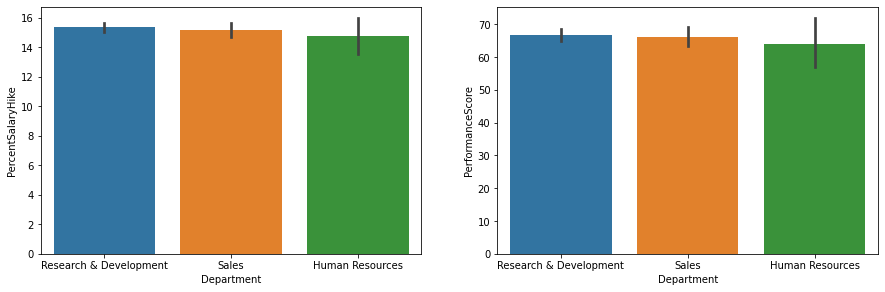

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(df['Department'],df['PercentSalaryHike'])
plt.subplot(2,2,2)
sns.barplot(df['Department'],df['PerformanceScore'])
plt.show()

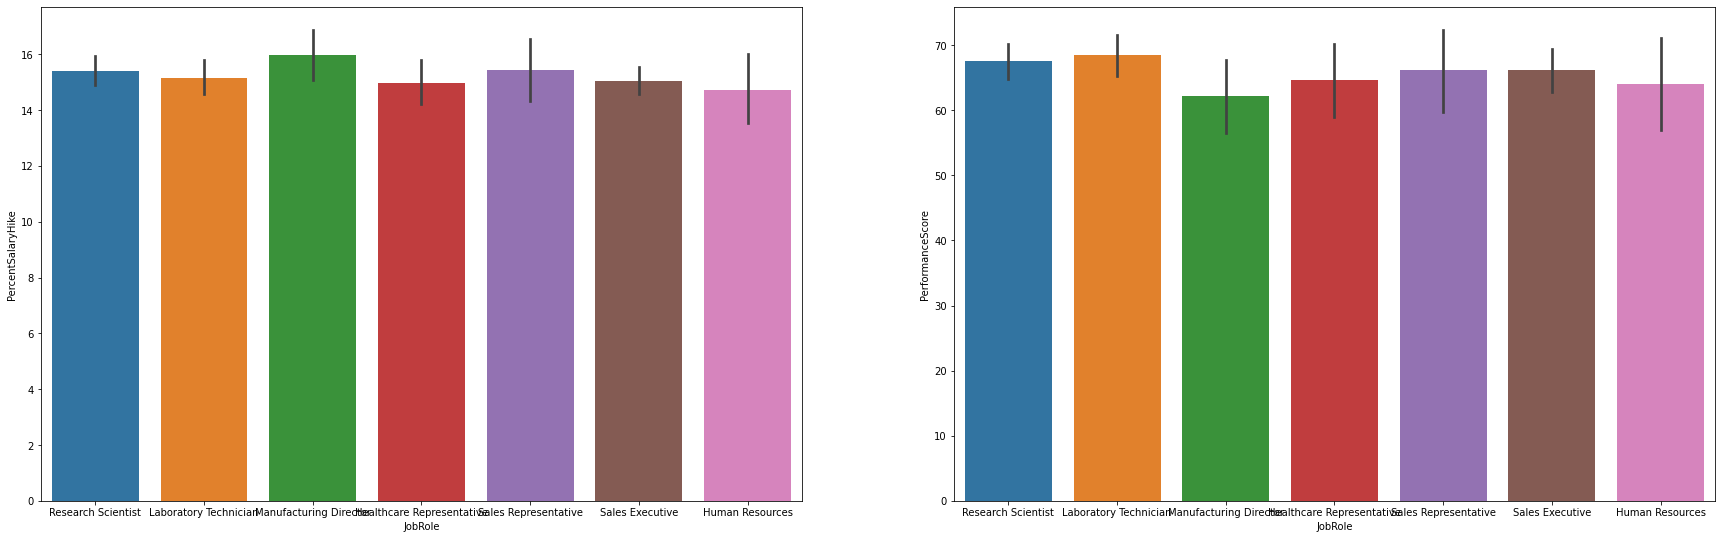

In [38]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(df['JobRole'],df['PercentSalaryHike'])
plt.subplot(2,2,2)
sns.barplot(df['JobRole'],df['PerformanceScore'])
plt.show()

In [39]:
df.groupby(by='Department')['PercentSalaryHike'].value_counts()

Department              PercentSalaryHike
Human Resources         11                    9
                        13                    5
                        16                    3
                        21                    3
                        14                    2
                        17                    2
                        19                    2
                        12                    1
                        15                    1
                        18                    1
                        22                    1
Research & Development  13                   64
                        12                   61
                        14                   61
                        11                   52
                        16                   32
                        17                   32
                        18                   31
                        15                   30
                        20                   2

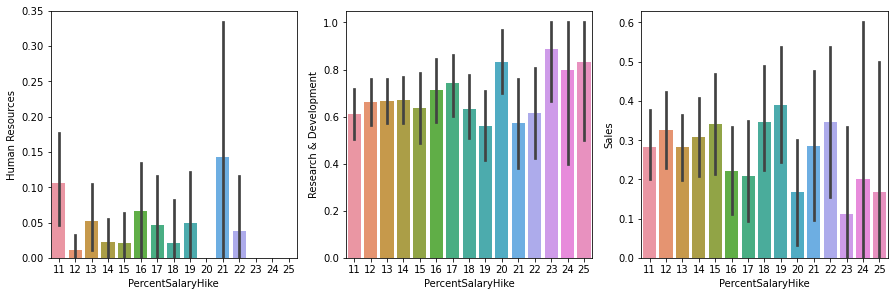

In [40]:
dept = pd.get_dummies(df['Department'])
perHike = pd.DataFrame(df['PercentSalaryHike'])
dept_hike = pd.concat([dept,perHike],axis=1)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_hike['PercentSalaryHike'],dept_hike['Human Resources'])
plt.subplot(2,3,2)
sns.barplot(dept_hike['PercentSalaryHike'],dept_hike['Research & Development'])
plt.subplot(2,3,3)
sns.barplot(dept_hike['PercentSalaryHike'],dept_hike['Sales'])
plt.show()

In [41]:
df.groupby(by='Department')['PerformanceScore'].value_counts()

Department       PerformanceScore
Human Resources  36                  2
                 52                  2
                 88                  2
                 31                  1
                 37                  1
                                    ..
Sales            59                  1
                 60                  1
                 65                  1
                 69                  1
                 90                  1
Name: PerformanceScore, Length: 163, dtype: int64

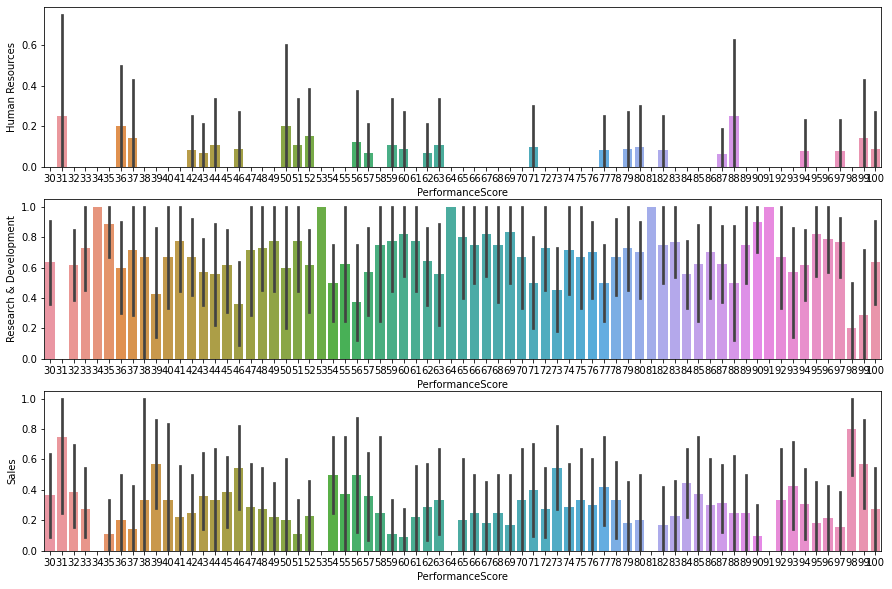

In [42]:
dept = pd.get_dummies(df['Department'])
perScr = pd.DataFrame(df['PerformanceScore'])
dept_perf = pd.concat([dept,perScr],axis=1)

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.barplot(dept_perf['PerformanceScore'],dept_perf['Human Resources'])
plt.subplot(3,1,2)
sns.barplot(dept_perf['PerformanceScore'],dept_perf['Research & Development'])
plt.subplot(3,1,3)
sns.barplot(dept_perf['PerformanceScore'],dept_perf['Sales'])
plt.show()

In [43]:
df = df[df["Department"] == "Research & Development"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       456 non-null    int64 
 1   Attrition                 456 non-null    object
 2   BusinessTravel            456 non-null    object
 3   DailyRate                 456 non-null    int64 
 4   Department                456 non-null    object
 5   DistanceFromHome          456 non-null    int64 
 6   Education                 456 non-null    int64 
 7   EducationField            456 non-null    object
 8   EmployeeCount             456 non-null    int64 
 9   EmployeeNumber            456 non-null    int64 
 10  EnvironmentSatisfaction   456 non-null    int64 
 11  Gender                    456 non-null    object
 12  PerformanceScore          456 non-null    int64 
 13  JobInvolvement            456 non-null    int64 
 14  JobLevel                 

In [44]:
df.groupby(by='Department')['JobRole'].value_counts()

Department              JobRole                  
Research & Development  Research Scientist           191
                        Laboratory Technician        144
                        Manufacturing Director        65
                        Healthcare Representative     56
Name: JobRole, dtype: int64

In [45]:
df = df[df["JobRole"] == "Research Scientist"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       191 non-null    int64 
 1   Attrition                 191 non-null    object
 2   BusinessTravel            191 non-null    object
 3   DailyRate                 191 non-null    int64 
 4   Department                191 non-null    object
 5   DistanceFromHome          191 non-null    int64 
 6   Education                 191 non-null    int64 
 7   EducationField            191 non-null    object
 8   EmployeeCount             191 non-null    int64 
 9   EmployeeNumber            191 non-null    int64 
 10  EnvironmentSatisfaction   191 non-null    int64 
 11  Gender                    191 non-null    object
 12  PerformanceScore          191 non-null    int64 
 13  JobInvolvement            191 non-null    int64 
 14  JobLevel                 

In [46]:
df.groupby(by='Department')['EducationField'].value_counts()

Department              EducationField  
Research & Development  Life Sciences       84
                        Medical             74
                        Technical Degree    24
                        Other                9
Name: EducationField, dtype: int64

### Feature Selection

In [47]:
#removing columns that are not reqiured
#ex- categorical columns, unique & constant columns
#categorical, unique and constant columns identified from profiling report
df = df.drop(labels=['Age', 'BusinessTravel', 'EmployeeNumber', 'DistanceFromHome', 'EmployeeCount', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole', 'Over18', 'OverTime', 'StandardHours' ], axis=1)
df.columns

Index(['Attrition', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [48]:
#getting top 10 columns for the target column Percentage of Salary Hike
#_psh = PercentSalaryHike
df["Attrition"] = df.Attrition.replace({'Yes': 1, 'No': 0})
x_psh = df[['Attrition', 'DailyRate', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] #independant columns
y_psh = df['PercentSalaryHike'] #target column

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#k=10 means getting top 10 best features
bestFeatures_psh = SelectKBest(score_func=chi2, k=10)
fit_psh = bestFeatures_psh.fit(x_psh,y_psh)

df_Cols_psh = pd.DataFrame(x_psh.columns)
df_Scores_psh = pd.DataFrame(fit_psh.scores_)

#creating the dataframe for better visualisation
ColScores_psh = pd.concat([df_Cols_psh, df_Scores_psh], axis=1)
ColScores_psh.columns = ['Features', 'Score']

#printing top 10 columns
ColScores_psh.nlargest(10,'Score')

,Features,Score
8,MonthlyRate,56508.012491
1,DailyRate,4192.655097
7,MonthlyIncome,3604.455598
19,YearsWithCurrManager,33.677968
16,YearsAtCompany,29.100898
13,TotalWorkingYears,28.944446
17,YearsInCurrentRole,23.296100
9,NumCompaniesWorked,18.778708
18,YearsSinceLastPromotion,14.660832
14,TrainingTimesLastYear,10.132253


In [50]:
#getting top 10 columns for the target column Performance Score
#_psc = PerformanceScore
x_psc = df[['Attrition', 'DailyRate', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] #independant columns
y_psc = df['PerformanceScore'] #target column

In [51]:
#k=10 means getting top 10 best features
bestFeatures_psc = SelectKBest(score_func=chi2, k=10)
fit_psc = bestFeatures_psc.fit(x_psc,y_psc)

df_Cols_psc = pd.DataFrame(x_psc.columns)
df_Scores_psc = pd.DataFrame(fit_psc.scores_)

#creating the dataframe for better visualisation
ColScores_psc = pd.concat([df_Cols_psc, df_Scores_psc], axis=1)
ColScores_psc.columns = ['Features', 'Score']

#printing top 10 columns
ColScores_psc.nlargest(10,'Score')

,Features,Score
8,MonthlyRate,253017.073424
7,MonthlyIncome,20229.208805
1,DailyRate,15271.460449
13,TotalWorkingYears,142.934831
17,YearsInCurrentRole,134.514733
16,YearsAtCompany,115.250735
19,YearsWithCurrManager,114.959179
9,NumCompaniesWorked,114.614314
12,StockOptionLevel,67.510390
18,YearsSinceLastPromotion,58.594574


In [52]:
print(ColScores_psh.nlargest(10,'Score'))
print("-----------")
print(ColScores_psc.nlargest(10,'Score'))

                   Features         Score
8               MonthlyRate  56508.012491
1                 DailyRate   4192.655097
7             MonthlyIncome   3604.455598
19     YearsWithCurrManager     33.677968
16           YearsAtCompany     29.100898
13        TotalWorkingYears     28.944446
17       YearsInCurrentRole     23.296100
9        NumCompaniesWorked     18.778708
18  YearsSinceLastPromotion     14.660832
14    TrainingTimesLastYear     10.132253
-----------
                   Features          Score
8               MonthlyRate  253017.073424
7             MonthlyIncome   20229.208805
1                 DailyRate   15271.460449
13        TotalWorkingYears     142.934831
17       YearsInCurrentRole     134.514733
16           YearsAtCompany     115.250735
19     YearsWithCurrManager     114.959179
9        NumCompaniesWorked     114.614314
12         StockOptionLevel      67.510390
18  YearsSinceLastPromotion      58.594574


In [53]:
#Common features for both target variables are taken here
df_fs = df[["MonthlyRate", "MonthlyIncome", "DailyRate", "NumCompaniesWorked", "TotalWorkingYears", 
            "YearsWithCurrManager", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
            "PercentSalaryHike", "PerformanceScore"]]
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MonthlyRate              191 non-null    int64
 1   MonthlyIncome            191 non-null    int64
 2   DailyRate                191 non-null    int64
 3   NumCompaniesWorked       191 non-null    int64
 4   TotalWorkingYears        191 non-null    int64
 5   YearsWithCurrManager     191 non-null    int64
 6   YearsAtCompany           191 non-null    int64
 7   YearsInCurrentRole       191 non-null    int64
 8   YearsSinceLastPromotion  191 non-null    int64
 9   PercentSalaryHike        191 non-null    int64
 10  PerformanceScore         191 non-null    int64
dtypes: int64(11)
memory usage: 17.9 KB


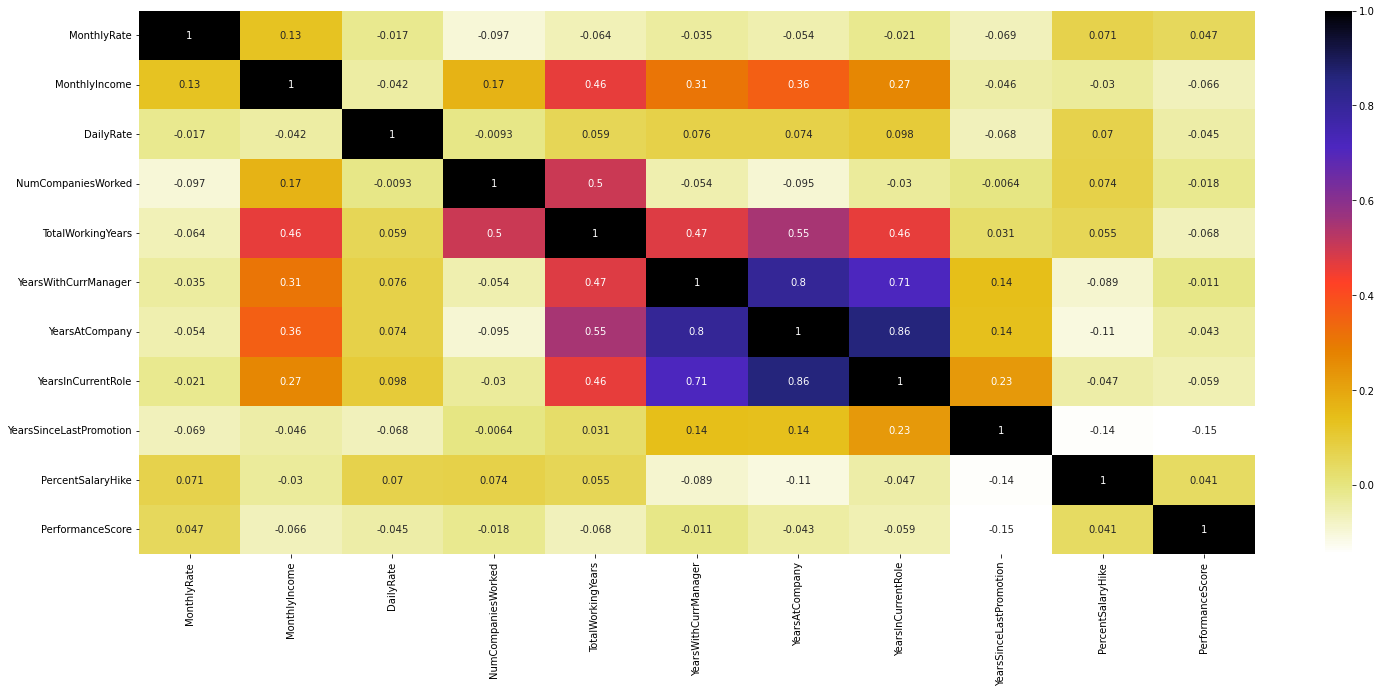

In [54]:
#checking correlation for the dataset
plt.figure(figsize=(25,10))
cor = df_fs.corr(method="spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
#function that helps to check the correlated features.
def correlation(dataset, threshold):
    corFeature=set()
    corrMatrix=dataset.corr(method="spearman")
    for i in range(len(corrMatrix.columns)):
        for j in range(i):
            if (corrMatrix.iloc[i,j] > threshold):
                colname = corrMatrix.columns[i]
                corFeature.add(colname)
    return corFeature

corrFeature = correlation(df_fs, 0.8)
corrFeature

{'YearsAtCompany', 'YearsInCurrentRole'}

In [56]:
#removing the correlated features from the dataset and vewing finalised features
# df_fs.drop(labels=corrFeature, axis=1, inplace=True)
# df_fs.columns

In [57]:
#Loading the columns after feature selection
df = df[['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'NumCompaniesWorked',
         'TotalWorkingYears', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'YearsAtCompany', 
         'PercentSalaryHike','PerformanceScore']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MonthlyRate              191 non-null    int64
 1   MonthlyIncome            191 non-null    int64
 2   DailyRate                191 non-null    int64
 3   NumCompaniesWorked       191 non-null    int64
 4   TotalWorkingYears        191 non-null    int64
 5   YearsWithCurrManager     191 non-null    int64
 6   YearsSinceLastPromotion  191 non-null    int64
 7   YearsAtCompany           191 non-null    int64
 8   PercentSalaryHike        191 non-null    int64
 9   PerformanceScore         191 non-null    int64
dtypes: int64(10)
memory usage: 16.4 KB


In [58]:
df.to_csv('Filtered_Dataset.csv')

### Analysing Dataset

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

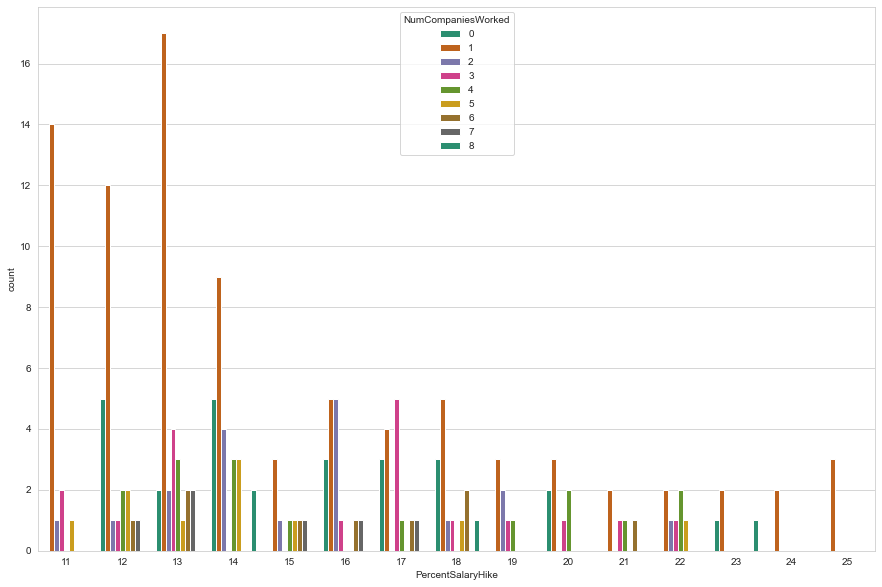

In [59]:
# Finding the relationship between PercentSalaryHike and NumCompaniesWorked
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='PercentSalaryHike',hue='NumCompaniesWorked',data=df,palette='Dark2')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

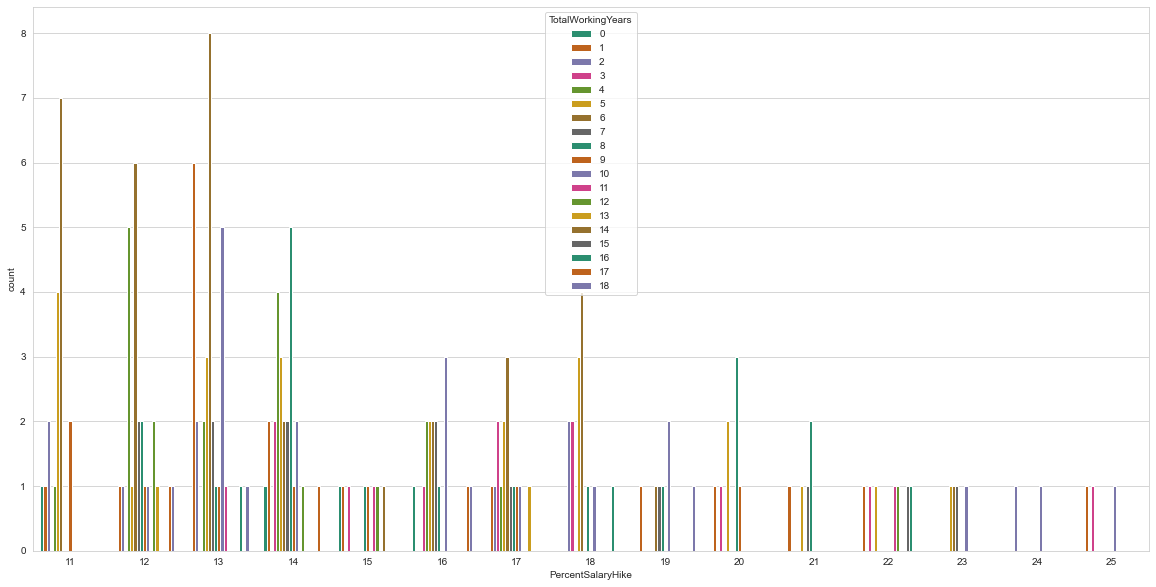

In [60]:
# Finding the relationship between PercentSalaryHike and TotalWorkingYears
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='PercentSalaryHike',hue='TotalWorkingYears',data=df,palette='Dark2')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

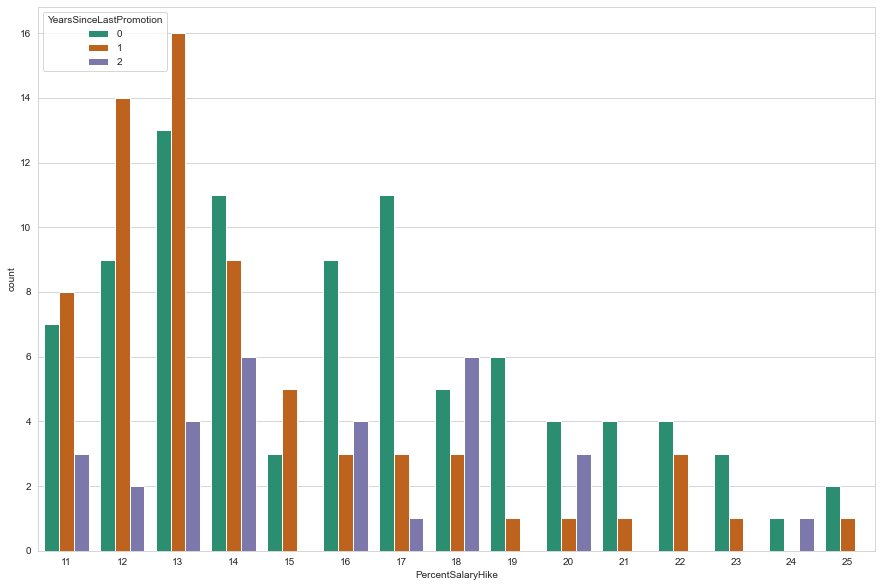

In [61]:
# Finding the relationship between PercentSalaryHike and YearsSinceLastPromotion
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='PercentSalaryHike',hue='YearsSinceLastPromotion',data=df,palette='Dark2')

In [62]:
#Check Maximum and Minimum value in MonthlyIncome column
print(df["MonthlyIncome"].min())
print(df["MonthlyIncome"].max())

1051
6962


In [63]:
#Check Maximum and Minimum value in MonthlyRate column
print(df["MonthlyRate"].min())
print(df["MonthlyRate"].max())

2122
26968


In [64]:
#Check Maximum and Minimum value in DailyRate column
print(df["DailyRate"].min())
print(df["DailyRate"].max())

111
1469


In [65]:
#Check Maximum and Minimum value in YearsSinceLastPromotion column
print(df["YearsSinceLastPromotion"].min())
print(df["YearsSinceLastPromotion"].max())

0
2


In [66]:
# Check Maximum and Minimum value in YearsWithCurrManager column
print(df["YearsWithCurrManager"].min())
print(df["YearsWithCurrManager"].max())

0
9


In [67]:
#Check Maximum and Minimum value in TotalWorkingYears column
print(df["TotalWorkingYears"].min())
print(df["TotalWorkingYears"].max())

0
18


In [68]:
#Check Maximum and Minimum value in NumCompaniesWorked column
print(df["NumCompaniesWorked"].min())
print(df["NumCompaniesWorked"].max())

0
8


In [69]:
#Check Maximum and Minimum value in PercentSalaryHike column
print(df["PercentSalaryHike"].min())
print(df["PercentSalaryHike"].max())

11
25


In [70]:
#Check Maximum and Minimum value in PerformanceScore column
print(df["PerformanceScore"].min())
print(df["PerformanceScore"].max())

30
100


In [71]:
#Check Maximum and Minimum value in PerformanceScore column
print(df["YearsAtCompany"].min())
print(df["YearsAtCompany"].max())

0
11


### Feature Creation

In [72]:
#Simplifying and grouping the MonthlyIncome column
conditions = [
    (df['MonthlyIncome'] < 2500),
    (df['MonthlyIncome'] >= 2500) & (df['MonthlyIncome'] < 5000),
    (df['MonthlyIncome'] >= 5000) 
    ]

values = ['less than 2500', '2500 & above', '5000 & above']

#adding the simplified column to a new calculated column
df['MonthlyIncome_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above


In [73]:
#Simplifying and grouping the MonthlyRate column

conditions = [
    (df['MonthlyRate'] < 5000),
    (df['MonthlyRate'] >= 5000) & (df['MonthlyRate'] < 10000),
    (df['MonthlyRate'] >= 10000) & (df['MonthlyRate'] < 15000),
    (df['MonthlyRate'] >= 15000) & (df['MonthlyRate'] < 20000),
    (df['MonthlyRate'] >= 20000) & (df['MonthlyRate'] < 25000),
    (df['MonthlyRate'] >= 25000)
    ]

values = ['less than 5000', '5000 & above', '10000 & above', '15000 & above', '20000 & above', '25000 & above' ]

#adding the simplified column to a new calculated column
df['MonthlyRate_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above


In [74]:
#Simplifying and grouping the DailyRate column

conditions = [
    (df['DailyRate'] < 250),
    (df['DailyRate'] >= 250) & (df['DailyRate'] < 500),
    (df['DailyRate'] >= 500) & (df['DailyRate'] < 750),
    (df['DailyRate'] >= 750) & (df['DailyRate'] < 1000),
    (df['DailyRate'] >= 1000) & (df['DailyRate'] < 1250),
    (df['DailyRate'] >= 1250) 
    ]

values = ['less than 250', '250 & above', '500 & above', '750 & above', '1000 & above', '1250 & above' ]

#adding the simplified column to a new calculated column
df['DailyRate_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above


In [75]:
#Simplifying and grouping the YearsAtCompany column

conditions = [
    (df['YearsAtCompany'] < 3),
    (df['YearsAtCompany'] >= 3) & (df['YearsAtCompany'] < 6),
    (df['YearsAtCompany'] >= 6) & (df['YearsAtCompany'] < 9),
    (df['YearsAtCompany'] >= 9) & (df['YearsAtCompany'] < 12),
    ]

values = ['less than 3 years', 'More than 3 years', 'More than 6 years', 'More than 9 years'] 

#adding the simplified column to a new calculated column
df['YearsAtCompany_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years


In [76]:
#Simplifying and grouping the TotalWorkingYears column

conditions = [
    (df['TotalWorkingYears'] < 3),
    (df['TotalWorkingYears'] >= 3) & (df['TotalWorkingYears'] < 6),
    (df['TotalWorkingYears'] >= 6) & (df['TotalWorkingYears'] < 9),
    (df['TotalWorkingYears'] >= 9) & (df['TotalWorkingYears'] < 12),
    (df['TotalWorkingYears'] >= 12) & (df['TotalWorkingYears'] < 15),
    (df['TotalWorkingYears'] >= 15) 
    ]

values = ['less than 3 years', 'More than 3 years', 'More than 6 years', 'More than 9 years', 'More than 12 years', 
          'More than 15 years']

#adding the simplified column to a new calculated column
df['TotalWorkingYears_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years,More than 9 years
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years,More than 6 years
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years,More than 6 years
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years,less than 3 years
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years,More than 6 years


In [77]:
#Simplifying and grouping the YearsSinceLastPromotion column

conditions = [
    (df['YearsSinceLastPromotion'] == 0),
    (df['YearsSinceLastPromotion'] == 1), 
    (df['YearsSinceLastPromotion'] == 2),
    ]

values = ['0 years', '1 year', '2 years' ]

#adding the simplified column to a new calculated column
df['YearsSinceLastPromotion_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years,More than 9 years,1 year
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years,More than 6 years,0 years
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years,More than 6 years,1 year
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years,less than 3 years,0 years
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years,More than 6 years,1 year


In [78]:
conditions = [
    (df['YearsWithCurrManager'] < 3),
    (df['YearsWithCurrManager'] >= 3) & (df['YearsWithCurrManager'] < 6),
    (df['YearsWithCurrManager'] >= 6) & (df['YearsWithCurrManager'] < 9)
    ]

values = ['less than 3 years', 'More than 3 years', 'More than 6 years']

#adding the simplified column to a new calculated column
df['YearsWithCurrManager_cal'] = np.select(conditions, values)
df.head()


,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years,More than 9 years,1 year,More than 6 years
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years,More than 6 years,0 years,More than 3 years
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years,More than 6 years,1 year,less than 3 years
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years,less than 3 years,0 years,less than 3 years
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years,More than 6 years,1 year,More than 3 years


In [79]:
# #Simplifying and grouping the NumCompaniesWorked column

conditions = [
    (df['NumCompaniesWorked'] < 2),
    (df['NumCompaniesWorked'] >= 2) & (df['NumCompaniesWorked'] < 4),
    (df['NumCompaniesWorked'] >= 4) & (df['NumCompaniesWorked'] < 6),
    (df['NumCompaniesWorked'] >= 6) & (df['NumCompaniesWorked'] < 8),
    ]

values = ['less than 2', 'less than 4','less than 6', 'less than 8']

#adding the simplified column to a new calculated column
df['NumCompaniesWorked_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years,More than 9 years,1 year,More than 6 years,less than 2
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years,More than 6 years,0 years,More than 3 years,less than 2
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years,More than 6 years,1 year,less than 3 years,less than 6
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years,less than 3 years,0 years,less than 3 years,less than 2
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years,More than 6 years,1 year,More than 3 years,less than 2


In [80]:
dfExport = df.copy()

In [81]:
# Checking newly created column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   MonthlyRate                  191 non-null    int64 
 1   MonthlyIncome                191 non-null    int64 
 2   DailyRate                    191 non-null    int64 
 3   NumCompaniesWorked           191 non-null    int64 
 4   TotalWorkingYears            191 non-null    int64 
 5   YearsWithCurrManager         191 non-null    int64 
 6   YearsSinceLastPromotion      191 non-null    int64 
 7   YearsAtCompany               191 non-null    int64 
 8   PercentSalaryHike            191 non-null    int64 
 9   PerformanceScore             191 non-null    int64 
 10  MonthlyIncome_cal            191 non-null    object
 11  MonthlyRate_cal              191 non-null    object
 12  DailyRate_cal                191 non-null    object
 13  YearsAtCompany_cal           191 n

In [82]:
#creating encoded labels and fit transforming them
lblMonthlyIncome = LabelEncoder()
df['MonthlyIncome_cal'] = lblMonthlyIncome.fit_transform(df['MonthlyIncome_cal'])

lblMonthlyRate = LabelEncoder()
df['MonthlyRate_cal'] = lblMonthlyRate.fit_transform(df['MonthlyRate_cal'])

lblDailyRate = LabelEncoder()
df['DailyRate_cal'] = lblDailyRate.fit_transform(df['DailyRate_cal'])

lblTotWorkYear = LabelEncoder()
df['TotalWorkingYears_cal'] = lblTotWorkYear.fit_transform(df['TotalWorkingYears_cal'])

lblYearsSinceLastPromotion = LabelEncoder()
df['YearsSinceLastPromotion_cal'] = lblYearsSinceLastPromotion.fit_transform(df['YearsSinceLastPromotion_cal'])

lblYearsWithCurrManager = LabelEncoder()
df['YearsWithCurrManager_cal'] = lblYearsWithCurrManager.fit_transform(df['YearsWithCurrManager_cal'])

lblNumCompaniesWorked = LabelEncoder()
df['NumCompaniesWorked_cal'] = lblNumCompaniesWorked.fit_transform(df['NumCompaniesWorked_cal'])

lblYearsAtCompany = LabelEncoder()
df['YearsAtCompany_cal'] = lblYearsAtCompany.fit_transform(df['YearsAtCompany_cal'])

# lblYearsInCurrentRole = LabelEncoder()
# df['YearsInCurrentRole_cal'] = lblYearsInCurrentRole.fit_transform(df['YearsInCurrentRole_cal'])


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   MonthlyRate                  191 non-null    int64
 1   MonthlyIncome                191 non-null    int64
 2   DailyRate                    191 non-null    int64
 3   NumCompaniesWorked           191 non-null    int64
 4   TotalWorkingYears            191 non-null    int64
 5   YearsWithCurrManager         191 non-null    int64
 6   YearsSinceLastPromotion      191 non-null    int64
 7   YearsAtCompany               191 non-null    int64
 8   PercentSalaryHike            191 non-null    int64
 9   PerformanceScore             191 non-null    int64
 10  MonthlyIncome_cal            191 non-null    int32
 11  MonthlyRate_cal              191 non-null    int32
 12  DailyRate_cal                191 non-null    int32
 13  YearsAtCompany_cal           191 non-null    int3

In [84]:
df

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal
1,24907,5130,279,1,10,7,1,10,23,61,1,2,2,2,4,1,2,1
16,15053,3298,334,0,7,5,0,6,12,80,0,1,2,1,3,0,1,1
19,4306,3944,371,5,6,2,1,3,11,45,0,5,2,0,3,1,3,3
23,19281,1232,391,1,0,0,0,0,14,96,2,1,2,3,5,0,3,1
35,21923,2645,1273,1,6,4,1,5,12,72,0,2,1,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,13422,2436,1037,6,6,2,1,4,12,42,2,0,0,0,3,1,3,4
1449,11288,2439,529,1,4,2,1,4,14,78,2,0,3,0,2,1,3,1
1455,2725,2809,1322,2,8,2,2,2,14,52,0,5,1,3,3,2,3,2
1458,8952,2977,287,1,4,1,1,4,12,62,0,4,2,0,2,1,3,1


In [85]:
#converting the int32 columns to int64
d = dict.fromkeys(df.select_dtypes(np.int32).columns, np.int64)
df = df.astype(d)

In [86]:
# copying dataframe
df_cpy = df.copy()

In [87]:
#having only the calculated columns in the dataset and assigning the target value to y
# x = df_cpy.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyIncome", "MonthlyRate", "DailyRate", "YearsSinceLastPromotion", "YearsAtCompany", "TotalWorkingYears", "NumCompaniesWorked"], axis=1)
# y_psh = df_cpy["PercentSalaryHike"]
x = df_cpy.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyRate", "MonthlyIncome", "DailyRate", "YearsSinceLastPromotion", "NumCompaniesWorked", "TotalWorkingYears", "YearsWithCurrManager", "YearsAtCompany"], axis=1)
y_psh = df_cpy["PercentSalaryHike"]

### Model Training 

#### DecisionTreeClassifier - PercentSalaryHike

In [88]:
# Training the model using Decision Tree Classifier
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.2,random_state=0)
dtc=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

dtc_model=GridSearchCV(estimator=dtc, param_grid=parameters, scoring='accuracy',cv=10)
dtc_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [89]:
#finding best parameters
dtc_model.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [90]:
# Predicting the decision tree classifier model
y_predict_dtc = dtc_model.predict(x_train)
y_predict_dtc_test = dtc_model.predict(x_test)

In [91]:
# Finding the accuracy and classification report
print(accuracy_score(y_train,y_predict_dtc))
print(accuracy_score(y_test,y_predict_dtc_test))
print(classification_report(y_test,y_predict_dtc_test))

0.7236842105263158
0.1282051282051282
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          12       0.22      0.67      0.33         3
          13       0.00      0.00      0.00         8
          14       1.00      0.25      0.40         4
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.50      0.33      0.40         6
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1

    accuracy                           0.13        39
   macro avg       0.11      0.08      0.0

#### Naive Bayes -  PercentSalaryHike

In [92]:
# Training the model using Naive Bayes 
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.2,random_state=1)
model_nb = BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [93]:
#Making predictions using nb
y_predict_nb = model_nb.predict(x_train)
y_predict_nb_test = model_nb.predict(x_test)

In [94]:
#Calculate accracy of the model and precision, recall, f1 score, support values
print(accuracy_score(y_train,y_predict_nb))
print(accuracy_score(y_test,y_predict_nb_test))

print(classification_report(y_train,y_predict_nb))

0.2565789473684211
0.2564102564102564
              precision    recall  f1-score   support

          11       0.27      0.21      0.24        14
          12       0.25      0.26      0.26        19
          13       0.20      0.67      0.30        24
          14       0.28      0.39      0.33        23
          15       1.00      0.17      0.29         6
          16       0.50      0.08      0.14        12
          17       0.67      0.13      0.22        15
          18       1.00      0.09      0.17        11
          19       1.00      0.17      0.29         6
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1

    accuracy                           0.26       152
   macro avg       0.34      0.15      0.1

#### KNN : K-Nearest Neighbor - PercentSalaryHike

In [95]:
# Training model using KNN
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.33,random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean') 
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [96]:
# Make predictions
y_predict_knn = knn_model.predict(x_train)
y_predict_knn_test = knn_model.predict(x_test)

In [97]:
#Calculate accracy of the model and precision, recall, f1 score, support values
print(accuracy_score(y_train,y_predict_knn))
print(accuracy_score(y_test,y_predict_knn_test))

print(classification_report(y_train,y_predict_knn))

0.28346456692913385
0.09375
              precision    recall  f1-score   support

          11       0.25      0.62      0.36        13
          12       0.26      0.50      0.34        16
          13       0.33      0.64      0.44        22
          14       0.08      0.05      0.06        21
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         9
          17       0.25      0.12      0.17         8
          18       0.80      0.44      0.57         9
          19       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1

    accuracy                           0.28       127
   macro avg       0.13      0.16      0.13       12

#### Support Vector Machine - PercentSalaryHike

In [98]:
# Training using SVC
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.2,random_state=0)
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(x_train,y_train)

In [99]:
#Make predictions
y_predict_svm = rbf_svc.predict(x_train)
y_predict_svm_test = rbf_svc.predict(x_test)

In [100]:
#Calculate accracy of the model and precision, recall, f1 score, support values
print(accuracy_score(y_train,y_predict_svm))
print(accuracy_score(y_test,y_predict_svm_test))
print(classification_report(y_train,y_predict_svm))

0.9802631578947368
0.05128205128205128
              precision    recall  f1-score   support

          11       0.85      1.00      0.92        17
          12       1.00      0.95      0.98        22
          13       1.00      1.00      1.00        25
          14       1.00      0.95      0.98        22
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00        13
          17       1.00      1.00      1.00         9
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00         5
          20       1.00      1.00      1.00         6
          21       1.00      1.00      1.00         4
          22       1.00      0.83      0.91         6
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         2
          25       1.00      1.00      1.00         2

    accuracy                           0.98       152
   macro avg       0.99      0.98      0.

#### Decision Tree Regressor - PercentSalaryHike

In [101]:
# splitting the dataset and the target into train and test data.
# x - dataset; y_psh - Target column (Performance Salary Hike)
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.3,random_state=0,shuffle=True,)
decsRegressor = DecisionTreeRegressor(random_state=0)
decsRegressor.fit(x_train, y_train)

decsRegressor_Test = DecisionTreeRegressor(random_state=0)
decsRegressor_Test.fit(x_test, y_test)

DecisionTreeRegressor(random_state=0)

In [102]:
#Checking the score of model containing training dataset
print(decsRegressor.score(x_train,y_train))

print(decsRegressor_Test.score(x_test,y_test))

0.9589350579614012
0.9766088245552843


In [103]:
#gettting predictions according to the trained model
y_predict = decsRegressor.predict(x_train)
y_predict

array([16.        , 16.        , 12.        , 14.        , 22.        ,
       11.        , 15.        , 11.        , 14.        , 16.        ,
       13.        , 14.        , 14.        , 18.        , 13.        ,
       21.        , 14.        , 16.        , 13.        , 11.        ,
       11.        , 12.        , 14.        , 11.        , 18.        ,
       14.        , 18.        , 19.        , 16.        , 14.        ,
       11.        , 13.        , 18.        , 12.        , 12.        ,
       23.        , 14.        , 17.        , 20.        , 22.        ,
       19.        , 18.        , 18.        , 12.        , 14.        ,
       15.        , 14.        , 15.        , 14.        , 11.5       ,
       24.        , 12.        , 13.        , 11.5       , 13.        ,
       13.        , 11.        , 15.66666667, 12.        , 12.        ,
       13.        , 16.        , 16.        , 12.        , 13.        ,
       20.        , 11.        , 16.        , 13.        , 25.  

In [104]:
#gettting predictions according to the test model
y_predict_test = decsRegressor_Test.predict(x_test)
y_predict_test

array([13. , 18. , 14. , 18. , 11. , 20. , 14. , 18. , 13. , 23. , 21. ,
       17. , 16. , 25. , 19. , 17. , 17. , 20. , 12.5, 13. , 13. , 16. ,
       12. , 17. , 22. , 13. , 17. , 13. , 14. , 12. , 12.5, 13. , 18. ,
       23. , 17. , 16. , 19. , 14. , 18. , 17. , 13. , 19. , 11. , 12. ,
       11. , 25. , 12. , 13. , 12. , 12. , 18. , 16. , 20. , 18. , 11. ,
       16. , 12. , 13. ])

In [105]:
#Make Predictions for both trained and test data
predictions = decsRegressor.predict(x)
print(len(predictions))
dfExport["Prediction_PercentSalaryHike"] = predictions

191


In [106]:
#Check Maximum and Minimum value in PerformanceScore column
print(dfExport["Prediction_PercentSalaryHike"].min())
print(dfExport["Prediction_PercentSalaryHike"].max())

11.0
25.0


In [107]:
#Simplifying and grouping the Prediction_PercentSalaryHike column
conditions = [
    (dfExport['Prediction_PercentSalaryHike'] < 13),
    (dfExport['Prediction_PercentSalaryHike'] >= 13) & (dfExport['Prediction_PercentSalaryHike'] < 15),
    (dfExport['Prediction_PercentSalaryHike'] >= 15) & (dfExport['Prediction_PercentSalaryHike'] < 17),
    (dfExport['Prediction_PercentSalaryHike'] >= 17) & (dfExport['Prediction_PercentSalaryHike'] < 20),
    (dfExport['Prediction_PercentSalaryHike'] >= 20) & (dfExport['Prediction_PercentSalaryHike'] < 22),
    (dfExport['Prediction_PercentSalaryHike'] >= 22) 
    ]

values = ['<13', '13-15', '15-17', '17-20', '20-22', '>22']

#adding the simplified column to a new calculated column
dfExport['Prediction_PercentSalaryHike_cal'] = np.select(conditions, values)
dfExport.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal,Prediction_PercentSalaryHike,Prediction_PercentSalaryHike_cal
1,24907,5130,279,1,10,7,1,10,23,61,5000 & above,20000 & above,250 & above,More than 9 years,More than 9 years,1 year,More than 6 years,less than 2,23.000000,>22
16,15053,3298,334,0,7,5,0,6,12,80,2500 & above,15000 & above,250 & above,More than 6 years,More than 6 years,0 years,More than 3 years,less than 2,12.000000,<13
19,4306,3944,371,5,6,2,1,3,11,45,2500 & above,less than 5000,250 & above,More than 3 years,More than 6 years,1 year,less than 3 years,less than 6,11.000000,<13
23,19281,1232,391,1,0,0,0,0,14,96,less than 2500,15000 & above,250 & above,less than 3 years,less than 3 years,0 years,less than 3 years,less than 2,15.666667,15-17
35,21923,2645,1273,1,6,4,1,5,12,72,2500 & above,20000 & above,1250 & above,More than 3 years,More than 6 years,1 year,More than 3 years,less than 2,17.000000,17-20


In [108]:
# Calculate R Squared score.
# The more the score is near 1, the best the model is
r2score_Train = r2_score(y_train, y_predict)
print(r2score_Train)

r2score_Test= r2_score(y_test, y_predict_test)
print(r2score_Test)

0.9589350579614012
0.9766088245552843


In [109]:
#Function to calculate the regression model's results
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    r2=metrics.r2_score(y_true, y_pred)
    mae=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    msle=metrics.mean_squared_log_error(y_true, y_pred)

    print('R Squared score: ', round(r2,4)) # a value closer to 1 is better  
    print('Mean Absolute Error: ', round(mae,4))
    print('Mean Squared Error: ', round(mse,4)) #lower value is better 0 is perfect
    print('Mean Squared Log Error: ', round(msle,4))
    

In [110]:
# Printing the statistical measure of the predictions 
print("Training Dataset Results:")
print("-------------------------")
regression_results(y_train, y_predict)
print(" ")
print("Testing Dataset Results:")
print("------------------------")
regression_results(y_test, y_predict_test)

Training Dataset Results:
-------------------------
R Squared score:  0.9589
Mean Absolute Error:  0.1028
Mean Squared Error:  0.49
Mean Squared Log Error:  0.0017
 
Testing Dataset Results:
------------------------
R Squared score:  0.9766
Mean Absolute Error:  0.1207
Mean Squared Error:  0.319
Mean Squared Log Error:  0.0009


In [111]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   MonthlyIncome_cal            191 non-null    int64
 1   MonthlyRate_cal              191 non-null    int64
 2   DailyRate_cal                191 non-null    int64
 3   YearsAtCompany_cal           191 non-null    int64
 4   TotalWorkingYears_cal        191 non-null    int64
 5   YearsSinceLastPromotion_cal  191 non-null    int64
 6   YearsWithCurrManager_cal     191 non-null    int64
 7   NumCompaniesWorked_cal       191 non-null    int64
dtypes: int64(8)
memory usage: 17.5 KB


In [112]:
lblYearsSinceLastPromotion.classes_

array(['0 years', '1 year', '2 years'], dtype=object)

In [113]:
# Creating a numpy array passing the input parameters
x = np.array([["2500 & above", "5000 & above", "250 & above", "More than 6 years", 
               "More than 6 years", "2 years", "less than 3 years", "less than 4" ]])
x


array([['2500 & above', '5000 & above', '250 & above',
        'More than 6 years', 'More than 6 years', '2 years',
        'less than 3 years', 'less than 4']], dtype='<U17')

In [114]:
lblYearsSinceLastPromotion.classes_

array(['0 years', '1 year', '2 years'], dtype=object)

In [115]:
# Transforming the input parameters using the lable encorders
x[:, 0] = lblMonthlyIncome.transform(x[:, 0])
x[:, 1] = lblMonthlyRate.transform(x[:, 1])
x[:, 2] = lblDailyRate.transform(x[:, 2])
x[:, 3] = lblYearsAtCompany.transform(x[:, 3])
x[:, 4] = lblTotWorkYear.transform(x[:, 4])
x[:, 5] = lblYearsSinceLastPromotion.transform(x[:, 5])
x[:, 6] = lblYearsWithCurrManager.transform(x[:, 6])
x[:, 7] = lblNumCompaniesWorked.transform(x[:, 7])

x =  x.astype(float)
x

array([[0., 4., 2., 1., 3., 2., 3., 2.]])

In [116]:
# Saving regressor model and the label encorders to the pickle file
# Creates a new file called EEP_MLScript_PercentSalaryHike.pkl
import pickle

data = {"model":decsRegressor, "lblMonthlyIncome": lblMonthlyIncome, "lblMonthlyRate": lblMonthlyRate, 
        "lblDailyRate": lblDailyRate, "lblYearsAtCompany": lblYearsAtCompany, "lblTotWorkYear": lblTotWorkYear, 
        "lblYearsSinceLastPromotion": lblYearsSinceLastPromotion, "lblYearsWithCurrManager": lblYearsWithCurrManager, 
        "lblNumCompaniesWorked": lblNumCompaniesWorked} 
with open('EEP_MLScript_PercentSalaryHike.pkl', 'wb') as file:
    pickle.dump(data, file)

In [117]:
# Reading the pickle file and finding predictions to make sure it returns the same predicted value as before
with open('EEP_MLScript_PercentSalaryHike.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
lblMonthlyIncome = data["lblMonthlyIncome"]
lblMonthlyRate = data["lblMonthlyRate"]
lblDailyRate = data["lblDailyRate"]
lblYearsAtCompany = data["lblYearsAtCompany"]
lblTotWorkYear = data["lblTotWorkYear"]
lblYearsSinceLastPromotion = data["lblYearsSinceLastPromotion"]
lblYearsWithCurrManager = data["lblYearsWithCurrManager"]
lblNumCompaniesWorked = data["lblNumCompaniesWorked"]

y_pred = regressor_loaded.predict(x)
y_pred

array([11.])

In [118]:
# copying dataset to a new dataframe
df_cpy2 = df.copy()
df_cpy2

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,MonthlyIncome_cal,MonthlyRate_cal,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal
1,24907,5130,279,1,10,7,1,10,23,61,1,2,2,2,4,1,2,1
16,15053,3298,334,0,7,5,0,6,12,80,0,1,2,1,3,0,1,1
19,4306,3944,371,5,6,2,1,3,11,45,0,5,2,0,3,1,3,3
23,19281,1232,391,1,0,0,0,0,14,96,2,1,2,3,5,0,3,1
35,21923,2645,1273,1,6,4,1,5,12,72,0,2,1,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,13422,2436,1037,6,6,2,1,4,12,42,2,0,0,0,3,1,3,4
1449,11288,2439,529,1,4,2,1,4,14,78,2,0,3,0,2,1,3,1
1455,2725,2809,1322,2,8,2,2,2,14,52,0,5,1,3,3,2,3,2
1458,8952,2977,287,1,4,1,1,4,12,62,0,4,2,0,2,1,3,1


In [119]:
# defining x and y cordinates for prediction
# x- predicting features y- target variable
x = df_cpy2.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyRate", "MonthlyIncome", "DailyRate", "YearsSinceLastPromotion", "NumCompaniesWorked", "TotalWorkingYears", "YearsWithCurrManager","YearsAtCompany"], axis=1)
y_psc = df_cpy2["PerformanceScore"]

#### DecisionTreeClassifier - PerformanceScore

In [120]:
#Model Traiining using DT Classifier
x_train, x_test, y_train, y_test = train_test_split(x,y_psc,test_size=0.33,random_state=0)
dtc=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

dtc_model=GridSearchCV(estimator=dtc, param_grid=parameters, scoring='accuracy',cv=5)
dtc_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [121]:
# Finding the best parameters for the model
dtc_model.best_params_

{'criterion': 'entropy', 'min_samples_split': 3}

In [122]:
# Making Predictions 
y_predict_dtree = dtc_model.predict(x_train)
y_predict_dtree_test = dtc_model.predict(x_test)

In [123]:
# Get accuracy core and  precision, recall, f1-score, support values
print(accuracy_score(y_train,y_predict_dtree))
print(accuracy_score(y_test,y_predict_dtree_test))
print(classification_report(y_train,y_predict_dtree))

0.6850393700787402
0.015625
              precision    recall  f1-score   support

          30       0.50      1.00      0.67         1
          32       0.50      1.00      0.67         2
          33       0.67      1.00      0.80         2
          35       0.75      1.00      0.86         3
          36       1.00      1.00      1.00         1
          37       0.50      1.00      0.67         1
          38       0.50      1.00      0.67         1
          39       0.50      1.00      0.67         1
          40       1.00      0.50      0.67         2
          41       0.00      0.00      0.00         1
          43       0.50      1.00      0.67         3
          44       1.00      1.00      1.00         1
          45       0.50      1.00      0.67         3
          47       0.50      1.00      0.67         2
          48       1.00      1.00      1.00         4
          49       0.50      1.00      0.67         1
          50       0.00      0.00      0.00         1

#### Naive Bayes - PerformanceScore

In [124]:
# Model training using NB
x_train, x_test, y_train, y_test = train_test_split(x,y_psc,test_size=0.2,random_state=0)
model_nb = BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [125]:
# Performing Predictions
y_predict_nb = model_nb.predict(x_train)
y_predict_nb_test = model_nb.predict(x_test)

In [126]:
#Get accuracy core and  precision, recall, f1-score, support values
print(accuracy_score(y_train,y_predict_nb))
print(accuracy_score(y_test,y_predict_nb_test))
print(classification_report(y_train,y_predict_nb))

0.13157894736842105
0.02564102564102564
              precision    recall  f1-score   support

          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         2
          35       0.33      0.33      0.33         3
          36       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         3
          43       0.00      0.00      0.00         3
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.11      0.25      0.

#### KNN : K-Nearest Neighbor - PerformanceScore

In [127]:
# Model training using KNN
x_train, x_test, y_train, y_test = train_test_split(x,y_psc,test_size=0.3,random_state=0)
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [128]:
# Make predictions
y_predict_knn = model_knn.predict(x_train)
y_predict_knn_test = model_knn.predict(x_test)

In [129]:
# Get accuracy core and  precision, recall, f1-score, support values
print(accuracy_score(y_train,y_predict_knn))
print(accuracy_score(y_test,y_predict_knn_test))
print(classification_report(y_train,y_predict_knn))

0.16541353383458646
0.034482758620689655
              precision    recall  f1-score   support

          30       0.00      0.00      0.00         1
          32       0.10      1.00      0.18         2
          33       0.20      1.00      0.33         2
          35       0.15      0.67      0.25         3
          36       0.07      0.33      0.12         3
          37       0.00      0.00      0.00         1
          38       1.00      1.00      1.00         1
          39       0.00      0.00      0.00         1
          40       0.20      0.50      0.29         2
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         3
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          47       0.33      0.50      0.40         2
          48       0.17      0.25      0.20         4
          49       0.00      0.00      0

#### Support Vector Machine - PerformanceScore

In [130]:
# Model Training using SVC
x_train, x_test, y_train, y_test = train_test_split(x,y_psc,test_size=0.3,random_state=0)
svc_model = SVC(kernel='rbf', C=100, random_state=10).fit(x_train,y_train)

In [131]:
# Making Predictions
y_predict_svm = svc_model.predict(x_train)
y_predict_svm_test = svc_model.predict(x_test)

In [132]:
# Get accuracy core and  precision, recall, f1-score, support values
print(accuracy_score(y_train,y_predict_svm))
print(accuracy_score(y_test,y_predict_svm_test))
print(classification_report(y_train,y_predict_svm))

0.9699248120300752
0.034482758620689655
              precision    recall  f1-score   support

          30       1.00      1.00      1.00         1
          32       1.00      1.00      1.00         2
          33       1.00      1.00      1.00         2
          35       1.00      1.00      1.00         3
          36       1.00      1.00      1.00         3
          37       1.00      1.00      1.00         1
          38       1.00      1.00      1.00         1
          39       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         2
          41       1.00      1.00      1.00         1
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         3
          44       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         3
          47       1.00      0.50      0.67         2
          48       1.00      1.00      1.00         4
          49       1.00      1.00      1.

#### Decision Tree Regressor - PerformanceScore

In [133]:
# training_data = df_cpy2.sample(frac=0.7, random_state=25)
# testing_data = df_cpy2.drop(training_data.index)

# print(f"No. of training examples: {training_data.shape[0]}")
# print(f"No. of testing examples: {testing_data.shape[0]}")


In [134]:
# x_train_psc = training_data.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyIncome", "MonthlyRate", "DailyRate", "YearsSinceLastPromotion", "YearsAtCompany", "TotalWorkingYears", "NumCompaniesWorked" ], axis=1)
# y_train_psc = training_data["PerformanceScore"]

# x_test_psc = testing_data.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyIncome", "MonthlyRate", "DailyRate", "YearsSinceLastPromotion", "YearsAtCompany", "TotalWorkingYears", "NumCompaniesWorked" ], axis=1)
# y_test_psc = testing_data["PerformanceScore"]

In [135]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_x_train_psc = scaler.fit_transform(x_train_psc)
# scaled_x_test_psc = scaler.fit_transform(x_test_psc)

In [136]:
# split data into training and testing datasets
# y_psc- target column (Performance Score)
x_train_psc, x_test_psc, y_train_psc, y_test_psc = train_test_split(x,y_psc,test_size=0.2,random_state=0)
decsRegressor = DecisionTreeRegressor(random_state=0)
decsRegressor.fit(x_train_psc, y_train_psc)

decsRegressor_Test = DecisionTreeRegressor(random_state=0)
decsRegressor_Test.fit(x_test_psc, y_test_psc)

DecisionTreeRegressor(random_state=0)

In [137]:
# Checking the score of model containing training dataset
print(decsRegressor.score(x_train_psc,y_train_psc))
print(decsRegressor_Test.score(x_test_psc,y_test_psc))

0.9665441385116843
0.9804782271342329


In [138]:
# prediction using the trained model

y_predict_psc = decsRegressor.predict(x_train_psc)
y_predict_psc


array([ 87.        ,  74.        ,  76.        , 100.        ,
        46.        ,  41.        ,  54.        ,  56.        ,
        72.        ,  42.        ,  66.        ,  64.        ,
        78.        ,  75.        ,  89.        ,  53.        ,
        42.        ,  94.        ,  83.        ,  74.        ,
        36.        ,  36.        ,  83.        ,  78.        ,
        42.        ,  54.        ,  57.        ,  68.        ,
       100.        ,  66.        ,  79.        ,  90.        ,
        65.        ,  55.        ,  66.        ,  78.        ,
        44.        ,  73.        ,  45.        ,  89.        ,
        67.        ,  61.        ,  96.        ,  30.        ,
        35.        ,  79.        ,  48.        ,  33.        ,
        66.        ,  82.        ,  59.        ,  97.        ,
        63.        ,  85.        ,  61.        ,  39.        ,
        66.        ,  69.        ,  90.        ,  60.        ,
        76.        ,  32.        ,  86.        ,  35.  

In [139]:
# Prediction using Test dataset
y_predict_psc_test = decsRegressor_Test.predict(x_test_psc)
y_predict_psc_test

array([ 92. ,  41. ,  97. ,  73. ,  84. ,  86. ,  84. ,  40. ,  35. ,
        76. ,  73. ,  89. ,  62. ,  67. ,  83. ,  86. ,  70. ,  71. ,
        60.5,  64. ,  43. ,  45. ,  90. ,  35. ,  73. ,  87. ,  43. ,
        83. ,  52. ,  65. ,  60.5,  96. ,  53. ,  94. , 100. ,  51. ,
        71. ,  72. ,  69. ])

In [140]:
# Get predictions for the whole dataset
predictions = decsRegressor.predict(x)
print(len(predictions))
dfExport["Prediction_PerformanceScore"] = predictions

191


In [141]:
print(dfExport["Prediction_PerformanceScore"].min())
print(dfExport["Prediction_PerformanceScore"].max())

30.0
100.0


In [142]:
#Simplifying and grouping the Prediction_PerformanceScore column
conditions = [
    (dfExport['Prediction_PerformanceScore'] < 40),
    (dfExport['Prediction_PerformanceScore'] >= 40) & (dfExport['Prediction_PerformanceScore'] < 50),
    (dfExport['Prediction_PerformanceScore'] >= 50) & (dfExport['Prediction_PerformanceScore'] < 60),
    (dfExport['Prediction_PerformanceScore'] >= 60) & (dfExport['Prediction_PerformanceScore'] < 70),
    (dfExport['Prediction_PerformanceScore'] >= 70) & (dfExport['Prediction_PerformanceScore'] < 80),
    (dfExport['Prediction_PerformanceScore'] >= 80) & (dfExport['Prediction_PerformanceScore'] < 90),
    (dfExport['Prediction_PerformanceScore'] >= 90) 
    ]

values = ['<40', '40-49', '50-59', '60-69', '70-79', '80-89', '>90']

#adding the simplified column to a new calculated column
dfExport['Prediction_PerformanceScore_cal'] = np.select(conditions, values)
dfExport.head()

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,...,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal,Prediction_PercentSalaryHike,Prediction_PercentSalaryHike_cal,Prediction_PerformanceScore,Prediction_PerformanceScore_cal
1,24907,5130,279,1,10,7,1,10,23,61,...,250 & above,More than 9 years,More than 9 years,1 year,More than 6 years,less than 2,23.000000,>22,61.000000,60-69
16,15053,3298,334,0,7,5,0,6,12,80,...,250 & above,More than 6 years,More than 6 years,0 years,More than 3 years,less than 2,12.000000,<13,80.000000,80-89
19,4306,3944,371,5,6,2,1,3,11,45,...,250 & above,More than 3 years,More than 6 years,1 year,less than 3 years,less than 6,11.000000,<13,45.000000,40-49
23,19281,1232,391,1,0,0,0,0,14,96,...,250 & above,less than 3 years,less than 3 years,0 years,less than 3 years,less than 2,15.666667,15-17,64.333333,60-69
35,21923,2645,1273,1,6,4,1,5,12,72,...,1250 & above,More than 3 years,More than 6 years,1 year,More than 3 years,less than 2,17.000000,17-20,49.000000,40-49


In [143]:
# finding R Squared score of the training and testing datasets
# The more the score is near 1, the best the model is.
r2score_psc = r2_score(y_train_psc, y_predict_psc)
print(r2score_psc)

r2score_psc = r2_score(y_test_psc, y_predict_psc_test)
print(r2score_psc)

0.9665441385116843
0.9804782271342329


In [144]:
# Finding the statistical results of the predictions
print("Training Dataset Results:")
print("-------------------------")
regression_results(y_train_psc, y_predict_psc)
print("")
print("Testing Dataset Results:")
print("------------------------")
regression_results(y_test_psc, y_predict_psc_test)

Training Dataset Results:
-------------------------
R Squared score:  0.9665
Mean Absolute Error:  0.6667
Mean Squared Error:  12.307
Mean Squared Log Error:  0.0025

Testing Dataset Results:
------------------------
R Squared score:  0.9805
Mean Absolute Error:  0.5897
Mean Squared Error:  6.7821
Mean Squared Log Error:  0.0019


In [145]:
# Creating a numpy array to perform predictions using the input paramenters
x = np.array([["2500 & above", "5000 & above", "250 & above", "More than 6 years", 
               "More than 6 years", "2 years", "less than 3 years", "less than 4" ]])
x

array([['2500 & above', '5000 & above', '250 & above',
        'More than 6 years', 'More than 6 years', '2 years',
        'less than 3 years', 'less than 4']], dtype='<U17')

In [146]:
# Transforming the input parameters using label encoders
x[:, 0] = lblMonthlyIncome.transform(x[:, 0])
x[:, 1] = lblMonthlyRate.transform(x[:, 1])
x[:, 2] = lblDailyRate.transform(x[:, 2])
x[:, 3] = lblYearsAtCompany.transform(x[:, 3])
x[:, 4] = lblTotWorkYear.transform(x[:, 4])
x[:, 5] = lblYearsSinceLastPromotion.transform(x[:, 5])
x[:, 6] = lblYearsWithCurrManager.transform(x[:, 6])
x[:, 7] = lblNumCompaniesWorked.transform(x[:, 7])

x =  x.astype(float)
x

array([[0., 4., 2., 1., 3., 2., 3., 2.]])

In [147]:
# Get the prediction for the input parameters
y_pred = decsRegressor.predict(x)
y_pred

array([44.])

In [148]:
# Saving the regressor and the lebel encoders to a pickle file 
# creates a file in the local disc named EEP_MLScript_PerformanceScore.pkl
data = {"model":decsRegressor, "lblMonthlyIncome": lblMonthlyIncome, "lblMonthlyRate": lblMonthlyRate, 
        "lblDailyRate": lblDailyRate, "lblYearsAtCompany": lblYearsAtCompany, "lblTotWorkYear": lblTotWorkYear, 
        "lblYearsSinceLastPromotion": lblYearsSinceLastPromotion, "lblYearsWithCurrManager": lblYearsWithCurrManager, 
        "lblNumCompaniesWorked": lblNumCompaniesWorked} 
with open('EEP_MLScript_PerformanceScore.pkl', 'wb') as file:
    pickle.dump(data, file)

In [149]:
# Reading the created file using the label encoders and getting predicted results frm the saved pickle file
with open('EEP_MLScript_PerformanceScore.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
lblMonthlyIncome = data["lblMonthlyIncome"]
lblMonthlyRate = data["lblMonthlyRate"]
lblDailyRate = data["lblDailyRate"]
lblYearsAtCompany = data["lblYearsAtCompany"]
lblTotWorkYear = data["lblTotWorkYear"]
lblYearsSinceLastPromotion = data["lblYearsSinceLastPromotion"]
lblYearsWithCurrManager = data["lblYearsWithCurrManager"]
lblNumCompaniesWorked = data["lblNumCompaniesWorked"]

y_pred = regressor_loaded.predict(x)
y_pred

array([44.])

In [150]:
dfExport.columns

Index(['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'NumCompaniesWorked',
       'TotalWorkingYears', 'YearsWithCurrManager', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'PercentSalaryHike', 'PerformanceScore',
       'MonthlyIncome_cal', 'MonthlyRate_cal', 'DailyRate_cal',
       'YearsAtCompany_cal', 'TotalWorkingYears_cal',
       'YearsSinceLastPromotion_cal', 'YearsWithCurrManager_cal',
       'NumCompaniesWorked_cal', 'Prediction_PercentSalaryHike',
       'Prediction_PercentSalaryHike_cal', 'Prediction_PerformanceScore',
       'Prediction_PerformanceScore_cal'],
      dtype='object')

In [151]:
dfExport.to_csv('Calculated_Employee_Dataset.csv')

In [152]:
dfExport

,MonthlyRate,MonthlyIncome,DailyRate,NumCompaniesWorked,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,PercentSalaryHike,PerformanceScore,...,DailyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,YearsWithCurrManager_cal,NumCompaniesWorked_cal,Prediction_PercentSalaryHike,Prediction_PercentSalaryHike_cal,Prediction_PerformanceScore,Prediction_PerformanceScore_cal
1,24907,5130,279,1,10,7,1,10,23,61,...,250 & above,More than 9 years,More than 9 years,1 year,More than 6 years,less than 2,23.000000,>22,61.000000,60-69
16,15053,3298,334,0,7,5,0,6,12,80,...,250 & above,More than 6 years,More than 6 years,0 years,More than 3 years,less than 2,12.000000,<13,80.000000,80-89
19,4306,3944,371,5,6,2,1,3,11,45,...,250 & above,More than 3 years,More than 6 years,1 year,less than 3 years,less than 6,11.000000,<13,45.000000,40-49
23,19281,1232,391,1,0,0,0,0,14,96,...,250 & above,less than 3 years,less than 3 years,0 years,less than 3 years,less than 2,15.666667,15-17,64.333333,60-69
35,21923,2645,1273,1,6,4,1,5,12,72,...,1250 & above,More than 3 years,More than 6 years,1 year,More than 3 years,less than 2,17.000000,17-20,49.000000,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,13422,2436,1037,6,6,2,1,4,12,42,...,1000 & above,More than 3 years,More than 6 years,1 year,less than 3 years,less than 8,22.000000,>22,42.000000,40-49
1449,11288,2439,529,1,4,2,1,4,14,78,...,500 & above,More than 3 years,More than 3 years,1 year,less than 3 years,less than 2,14.000000,13-15,78.000000,70-79
1455,2725,2809,1322,2,8,2,2,2,14,52,...,1250 & above,less than 3 years,More than 6 years,2 years,less than 3 years,less than 4,16.000000,15-17,44.000000,40-49
1458,8952,2977,287,1,4,1,1,4,12,62,...,250 & above,More than 3 years,More than 3 years,1 year,less than 3 years,less than 2,12.000000,<13,62.000000,60-69
